<a href="https://colab.research.google.com/github/effection00/projects/blob/main/%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94%EC%98%88%EC%B8%A1_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
!pip install category_encoders

In [336]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [337]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/train.csv")
age_gender = pd.read_csv("/content/drive/MyDrive/age_gender_info.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")


In [338]:
df.shape

(2952, 15)

In [339]:
train = df

# 전처리 

In [340]:
# 데이터 중복제거
train.drop_duplicates(inplace=True)

In [341]:
train.shape

(2632, 15)

## 특이값 처리

In [342]:
train[train['임대보증금']=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,-,-,0.0,3.0,338.0,345.0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,-,-,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,-,-,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,-,-,0.0,8.0,664.0,744.0


In [343]:
# 특이문자 "ㅡ" 존재 => 0으로 대체
train.loc[train['임대보증금']=='-','임대보증금'] = None
train['임대보증금']=pd.to_numeric(train['임대보증금'])

In [344]:
test.loc[test['임대보증금']=='-','임대보증금'] = None
test['임대보증금']=pd.to_numeric(test['임대보증금'])

In [345]:
# 임대보증금과 동일하게 처리
train.loc[train['임대료']=='-','임대료'] = None
train['임대료']=pd.to_numeric(train['임대료'])

In [346]:
test.loc[test['임대료']=='-','임대료'] = None
test['임대료']=pd.to_numeric(test['임대료'])

## 결측값 처리

In [347]:
df.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           304
임대료                             313
도보 10분거리 내 지하철역 수(환승노선 수 반영)    155
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [348]:
# 그래프 한글처리
%matplotlib inline
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [349]:
import matplotlib.pyplot
import matplotlib as mpl

mpl.pyplot.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False

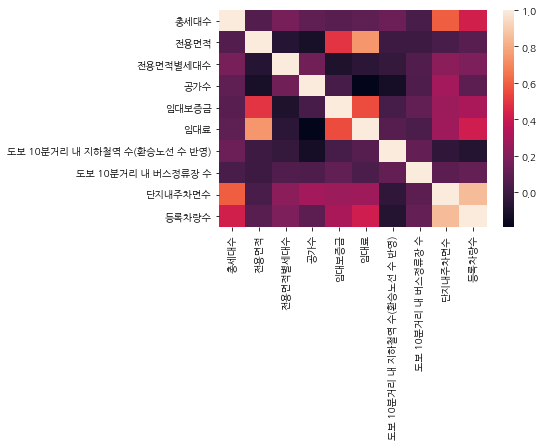

In [350]:
import seaborn as sns
sns.heatmap(train.corr()) 

# 전용면적은 임대료와 임대보증금과 연관 관계가 깊다 -> 전용면접에 따라 결측치 처리
# 타겟값은 단지내 주차면수와 큰 관련이 있다는 것을 알 수 있음

In [351]:
train['전용면적'].describe()

count    2632.000000
mean       46.091303
std        32.559242
min        12.620000
25%        36.500000
50%        46.405000
75%        51.850000
max       583.400000
Name: 전용면적, dtype: float64

## 임대보증금, 임대료 결측치
### 전용면적 범주화 후 결측치 채우기 

In [352]:
bins = [0,12,36,46,51,584]
label = [0,1,2,3,4]
train['전용면적범주화'] = pd.cut(train['전용면적'],bins,right=False , labels= label)

bins = [0,12,36,46,51,584]
label = [0,1,2,3,4]
test['전용면적범주화'] = pd.cut(test['전용면적'],bins,right=False , labels= label)

In [353]:
# 전용면적 범주가 같은 단지코드의 임대보증금의 중앙값과 임대료의 중앙값을 넣어줌

train['임대보증금'].fillna(train.groupby('전용면적범주화')['임대보증금'].transform('median'),inplace=True)
train['임대료'].fillna(train.groupby('전용면적범주화')['임대료'].transform('median'),inplace=True)

test['임대보증금'].fillna(test.groupby('전용면적범주화')['임대보증금'].transform('median'),inplace=True)
test['임대료'].fillna(test.groupby('전용면적범주화')['임대료'].transform('median'),inplace=True)

In [354]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                             0
임대료                               0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    155
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
전용면적범주화                           0
dtype: int64

In [355]:
test[test.임대보증금.isnull()]
# 전용면적범주화의 값이 0이므로 임대료와 보증금을 train 데이터 최소값으로 넣어주기

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,전용면적범주화
233,C1812,1021,상가,울산광역시,임대상가,9.96,1,22.0,D,NaN,NaN,0.0,4.0,185.0,0


In [356]:
test['임대료'].fillna(train.임대료.min(),inplace=True)
test['임대보증금'].fillna(train.임대보증금.min(),inplace=True)

## 도보 10분내 지하철역 수 , 도보 10분거리 내 지하철역 수

In [357]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts()

0.0    2130
1.0     308
2.0      33
3.0       6
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

In [358]:
# 0이 대부분이므로 결측치 최빈값으로 넣어줌
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
train['도보 10분거리 내 버스정류장 수']=train['도보 10분거리 내 버스정류장 수'].fillna(0)

test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
test['도보 10분거리 내 버스정류장 수']=test['도보 10분거리 내 버스정류장 수'].fillna(0)

In [359]:
train = train.drop(['전용면적범주화'],axis=1)
test = test.drop(['전용면적범주화'],axis=1)

In [360]:
test.isnull().sum()

단지코드                            0
총세대수                            0
임대건물구분                          0
지역                              0
공급유형                            0
전용면적                            0
전용면적별세대수                        0
공가수                             0
자격유형                            2
임대보증금                           0
임대료                             0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
도보 10분거리 내 버스정류장 수              0
단지내주차면수                         0
dtype: int64

In [361]:
test[test.자격유형.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [362]:
test.loc[test['단지코드']=='C2411']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0


In [363]:
test.loc[test['단지코드']=='C2253'].head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,12480000.0,97540.0,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,12480000.0,97540.0,0.0,2.0,173.0


In [364]:
# train 데이터로 확인해보기
train[(train.임대건물구분 == '아파트') & (train.공급유형 == '영구임대') & (train.전용면적 <30) & (train.전용면적별세대수 >700) ].자격유형.value_counts()

C    5
F    1
Name: 자격유형, dtype: int64

In [365]:
test.loc[test['단지코드']=='C2411', '자격유형'] = 'A'
test.loc[test['단지코드']=='C2253	', '자격유형'] = 'C'

# EDA

In [366]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [367]:
len(train['단지코드'].unique())

423

In [368]:
len(train)

2632

In [369]:
new = pd.DataFrame(train.groupby(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '공가수',
       '자격유형', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수','등록차량수'])['임대보증금','임대료','전용면적별세대수','전용면적'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [370]:
round(new.head(),0)
# 단지코드 내의 건물들은 임대보증금, 임대료, 전용면적별세대수, 전용면적 특성외에는 큰 차이가 없는 것으로 보인다 => 등록챠랑수도 이를 기반으로 구할 수 있을 것으로 보임 

임대보증금  ...  전용면적
단지코드  총세대수 임대건물구분 지역    공급유형 공가수  자격유형 도보 10분거리 내 지하철역 수(환승노선 수 반영) 도보 10분거리 내 버스정류장 수 단지내주차면수 등록차량수               ...      
C1000 566  아파트    충청북도  국민임대 10.0 A    0.0                          1.0                438.0   481.0   13203571.0  ...  45.0
C1004 521  상가     충청남도  임대상가 3.0  D    0.0                          2.0                153.0   93.0    14634538.0  ...  44.0
           아파트    충청남도  영구임대 3.0  C    0.0                          2.0                153.0   93.0     4705000.0  ...  39.0
C1005 1144 아파트    충청남도  국민임대 16.0 A    0.0                          8.0                950.0   376.0   17107667.0  ...  54.0
C1013 1308 아파트    광주광역시 국민임대 16.0 A    0.0                          6.0                1119.0  1665.0  24924800.0  ...  46.0

[5 rows x 4 columns]

# 타겟값 분리 

In [371]:
target = train['등록차량수']
train = train.drop(['등록차량수'],axis=1)

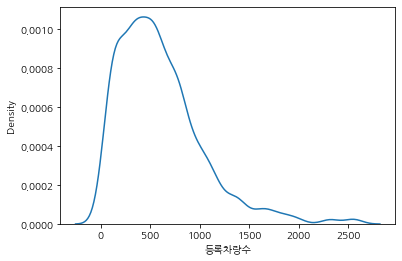

In [372]:
# 타겟값 분포 
sns.kdeplot(target);
plt.show();

### 범주형 변수 원핫인코딩&라벨인코딩



In [373]:
from category_encoders import OneHotEncoder

onehot = OneHotEncoder(cols=['임대건물구분','공급유형','자격유형'])
train = onehot.fit_transform(train)
test = onehot.transform(test)

In [374]:
# 범주가 커서 단지코드와 지역은 라벨인코딩

from category_encoders import OrdinalEncoder
ordinal = OrdinalEncoder(cols=['단지코드','지역'])
train = ordinal.fit_transform(train)
test = ordinal.fit_transform(test)

### 다른 인코딩방법

In [375]:
# LeaveOneOutEncoder 사용
# from category_encoders import LeaveOneOutEncoder

# catboostencoder
# leave =  LeaveOneOutEncoder()
# train_X['단지코드'] = leave.fit_transform(train_X['단지코드'],train_y)
# test['단지코드'] = leave.transform(test['단지코드'])

##이상치탐지

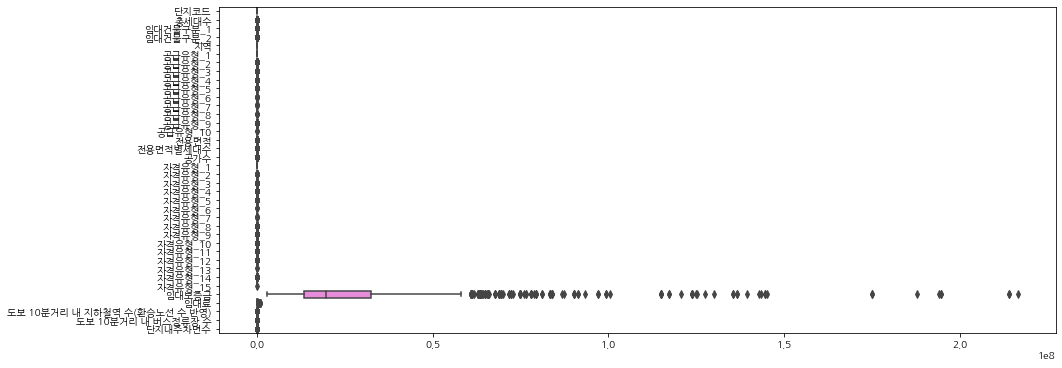

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=train,orient='h', ax=ax)


In [377]:
import numpy as np

def outliers_iqr(data):
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3-q1
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr * 1.5)
  return train[(data>upper_bound)|(data<lower_bound)]

In [378]:
outer = outliers_iqr(train['임대보증금'])
train = train.drop(outer.index, axis=0)

# StandardScaler : 이상치에 민감하므로 이상치 처리 후 사용

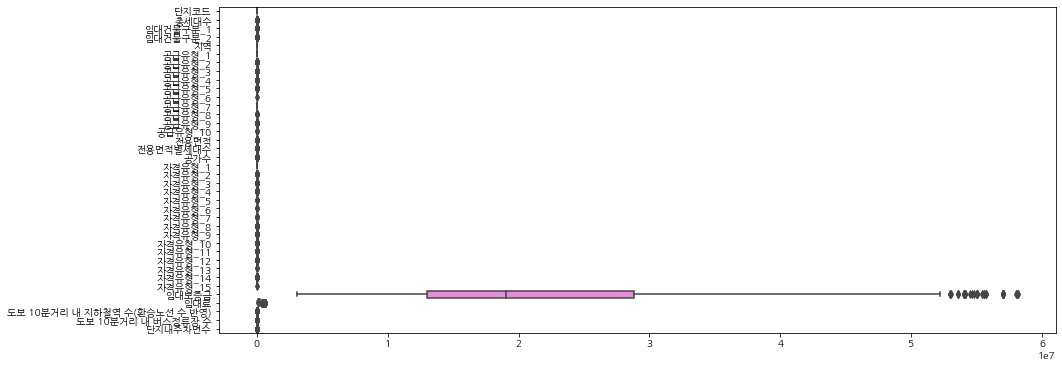

In [379]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=train,orient='h', ax=ax)

In [381]:
from sklearn.preprocessing import StandardScaler
import numpy as np
st =  StandardScaler()
train.loc[:,'임대보증금':'임대료']=st.fit_transform(train[['임대보증금','임대료']])
test.loc[:,'임대보증금':'임대료'] = st.transform(test[['임대보증금','임대료']])

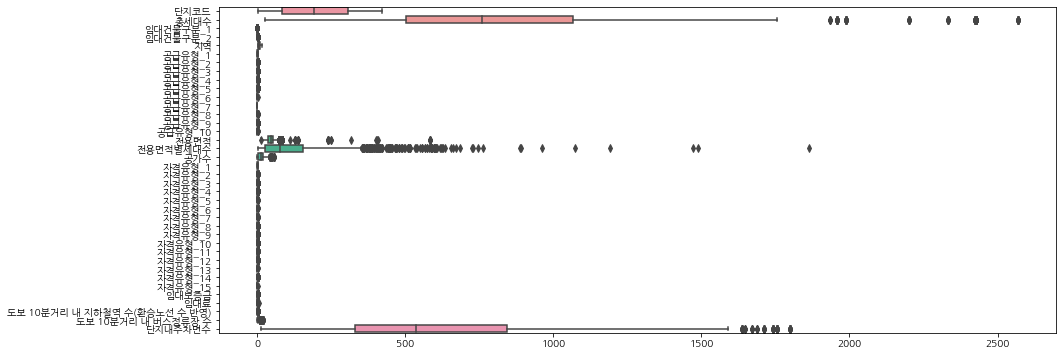

In [383]:
f, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=train,orient='h', ax=ax)

In [385]:
outer = outliers_iqr(train['전용면적별세대수'])
train = train.drop(outer.index, axis=0)
outer = outliers_iqr(train['전용면적'])
train = train.drop(outer.index, axis=0)

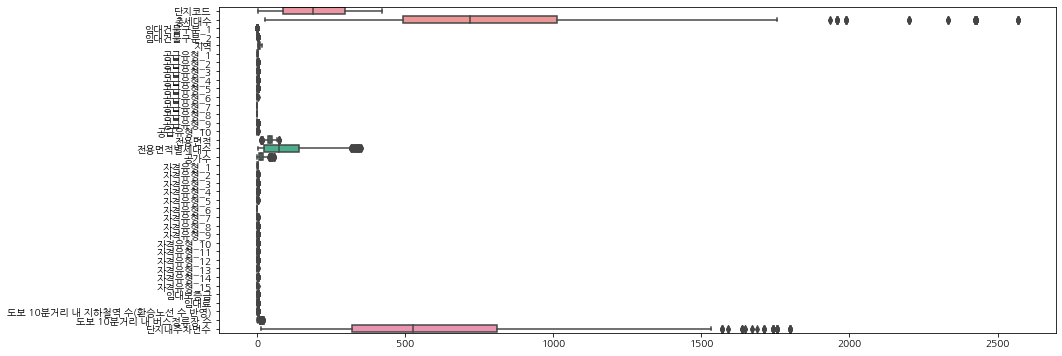

In [386]:
f, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=train,orient='h', ax=ax)

In [387]:
train.loc[:,'단지코드':'총세대수']=st.fit_transform(train[['단지코드','총세대수']])
test.loc[:,'단지코드':'총세대수'] = st.transform(test[['단지코드','총세대수']])

In [94]:
train= train.drop(outliers_iqr(train['전용면적'])[0], axis=0)

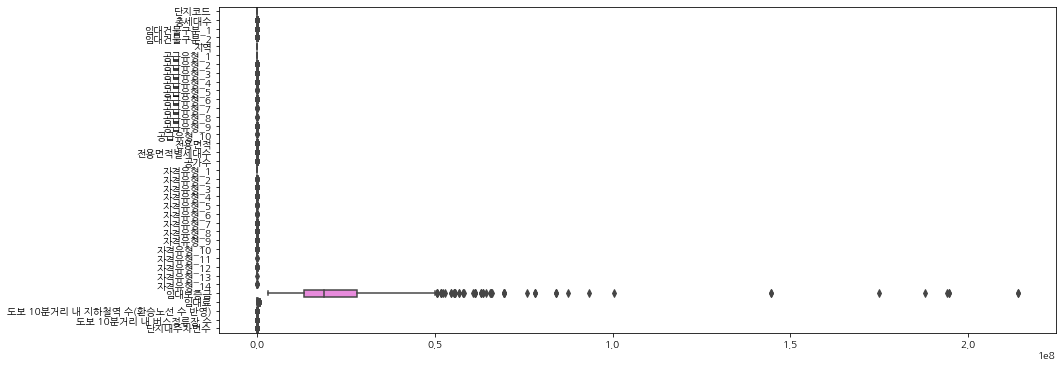

In [214]:
f, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=train,orient='h', ax=ax)

In [97]:
len(outliers_iqr(train['임대보증금'])[0])

71

In [ ]:
outliers_iqr(train['전용면적'])[0]

# 베이스 모델 성능

In [194]:
from sklearn.metrics import mean_absolute_error
# 회귀 분석이므로 평균값으로 베이스라인 모델 성능측정 
base = target.copy()
base.loc[:] = target.mean()
mean_absolute_error(target,base)

290.49700967859746

## XGBRegressor 모델 생성

In [195]:
# MAE 측정 ( => 에러의 절대값을 취해 에러가 그대로 반영)
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
model = XGBRegressor(max_depth=15,objective='reg:squarederror')

### 파라미터 튜닝 전 CV

In [196]:
cross_val_score(model, train,target, cv=10, 
                         scoring='neg_mean_absolute_error',).mean()

-153.4343606436243

 # 파라미터 튜닝:RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBRegressor

param_distributions = { 
    'n_estimators': randint(50, 500),
    'learning_rate': [0.001, 0.01, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.4,  0.6, 0.7, 1.0],
        'colsample_bylevel': [0.4, 0.6,  0.8,  1.0],
        'min_child_weight': [0.5, 3.0, 5.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    'max_depth': [5, 10, 15, 20, None]
}


search = RandomizedSearchCV(
    XGBRegressor(random_state=2,objective='reg:squarederror'), 
    param_distributions=param_distributions, 
    n_iter=20, 
    cv=5, 
   scoring='neg_mean_absolute_error',
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=2
)

search.fit(train, target);

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

In [ ]:
from sklearn.model_selection import cross_val_score
best_model = search.best_estimator_
cross_val_score(best_model, train,target, cv=10, 
                         scoring='neg_mean_absolute_error').mean()